# EDA

## Import libs

In [100]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2

from IPython.display import display


## Loading Dataset

In [101]:
print("Loading data...")
df = load_stroke_data()
display(df.head())

Loading data...
Attempting to load file: healthcare-dataset-stroke-data.csv from dataset fedesoriano/stroke-prediction-dataset
Dataset loaded successfully!


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Well, at first look we can see that :  
- The target variable is binary (stroke 1/0).  
- We have also numerical and categorical features.

## Dataset stats

In [94]:
# %%
# infos
if df is not None:
    print("------ ------")
    print("General Information:") # Modifié
    print("------ ------")
    df.info()

    # Missing values
    print("\n------ ------")
    print("Missing Values (%)") # Modifié
    print("------ ------")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    if missing_percent.sum() > 0:
        display(missing_percent[missing_percent > 0])
    else:
        # Garder la cohérence, même si pas de titre ici
        print("No missing values.") # Modifié

    # Duplicate lines
    print("\n------ ------")
    duplicate_rows = df.duplicated().sum()
    print(f"Duplicate Lines: {duplicate_rows}") # Modifié
    print("------ ------")


    # Unique values per column in %
    print("\n------ ------")
    print("Unique Values per Column (%)") # Modifié
    print("------ ------")
    unique_counts = df.nunique().sort_values()
    unique_counts = unique_counts/len(df) * 100
    display(unique_counts)

    # Data types (Descriptive stats)
    print("\n------ ------")
    print("Descriptive Statistics (Numerical)") # Modifié
    print("------ ------")
    display(df.describe())

else:
    print("DataFrame not loaded.") # Modifié


------ ------
General Information:
------ ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

------ ------
Missing Values (%)
------ ------


bmi    3.933464
dtype: float64


------ ------
Duplicate Lines: 0
------ ------

------ ------
Unique Values per Column (%)
------ ------


hypertension           0.039139
heart_disease          0.039139
ever_married           0.039139
Residence_type         0.039139
stroke                 0.039139
gender                 0.058708
smoking_status         0.078278
work_type              0.097847
age                    2.035225
bmi                    8.180039
avg_glucose_level     77.866928
id                   100.000000
dtype: float64


------ ------
Descriptive Statistics (Numerical)
------ ------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Dataset is pretty clean,  
- no missing values  
- no outliers  
- no duplicates  
- no need for any preprocessing  

Except for bmi, (almost 4% of the data is missing), we can fill it with the median.

## Visual Univariate Analysis

Numerical variables to analyze: ['age', 'avg_glucose_level', 'bmi']

--- Distribution of 'age' ---


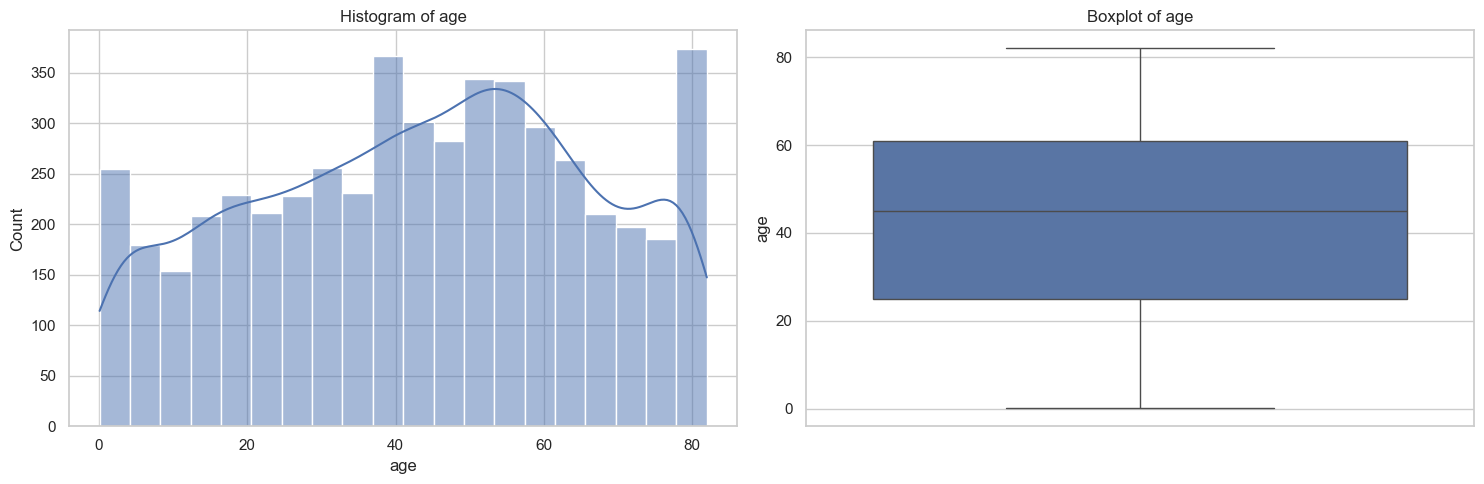


--- Distribution of 'avg_glucose_level' ---


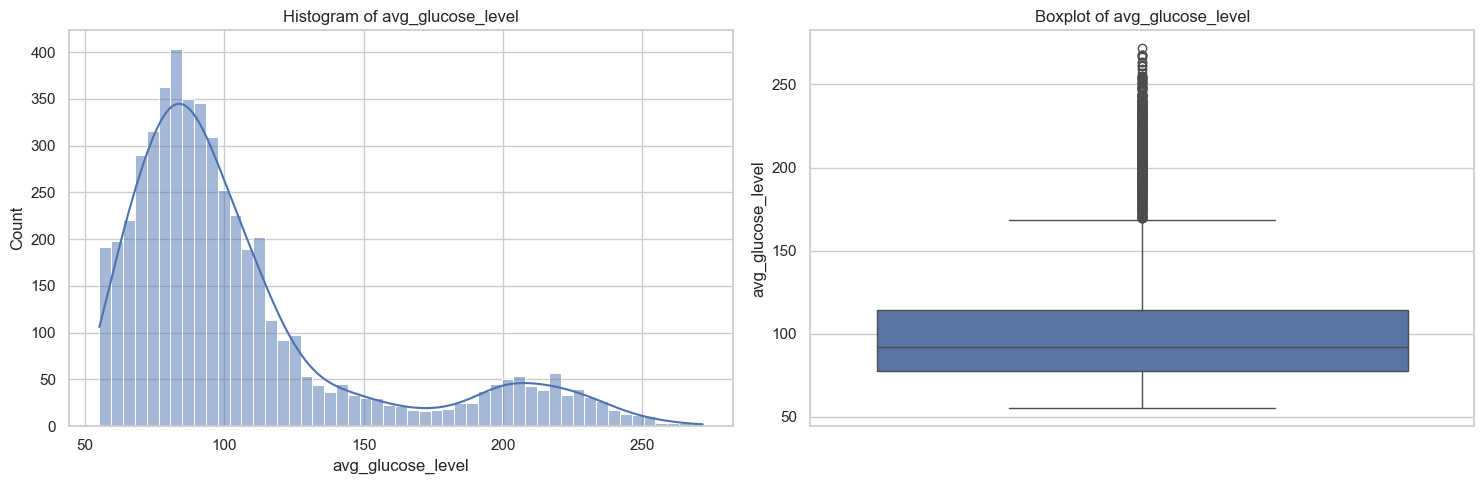


--- Distribution of 'bmi' ---


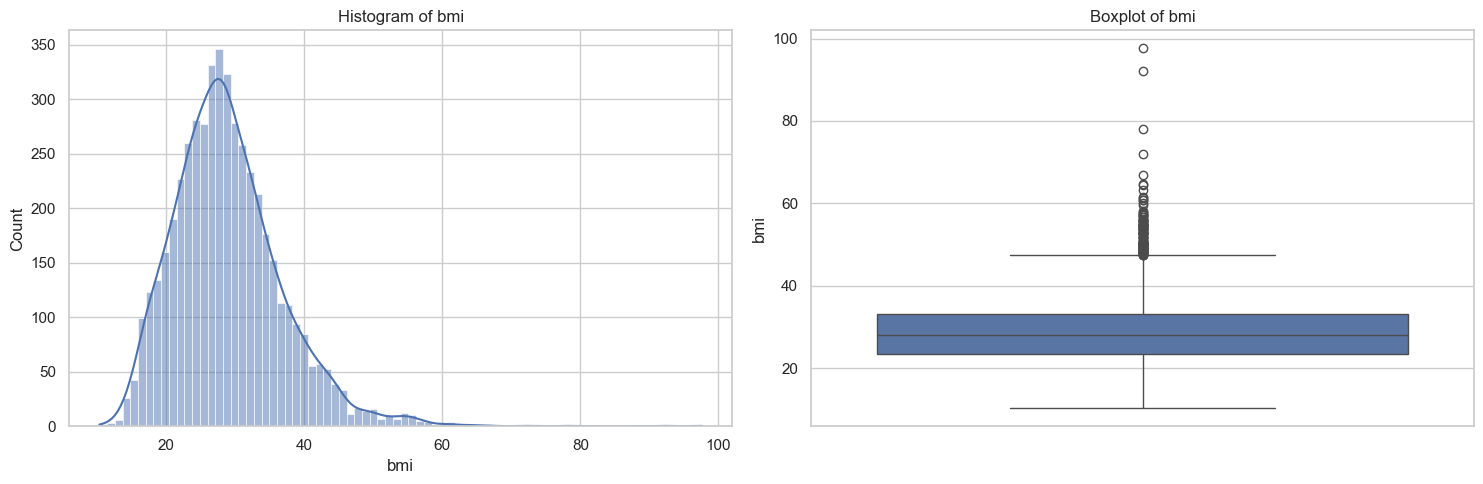

In [95]:
# Identify numerical columns (excluding 'id' and target 'stroke')
if df is not None:
    numerical_cols = df.select_dtypes(include=load_libs.np.number).columns.tolist()
    cols_to_exclude = ['id', 'stroke','hypertension', 'heart_disease']
    numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]
    print(f"Numerical variables to analyze: {numerical_cols}")

    # Create histograms and boxplots for each numerical variable
    for col in numerical_cols:
        print(f"\n--- Distribution of '{col}' ---")
        fig, axes = load_libs.plt.subplots(1, 2, figsize=(15, 5))

        # Histogram with KDE
        load_libs.sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')

        # Boxplot
        load_libs.sns.boxplot(y=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')

        load_libs.plt.tight_layout()
        load_libs.plt.show()

Categorical/binary variables to analyze: ['Residence_type', 'ever_married', 'gender', 'heart_disease', 'hypertension', 'smoking_status', 'stroke', 'work_type']

--- Distribution of 'Residence_type' ---


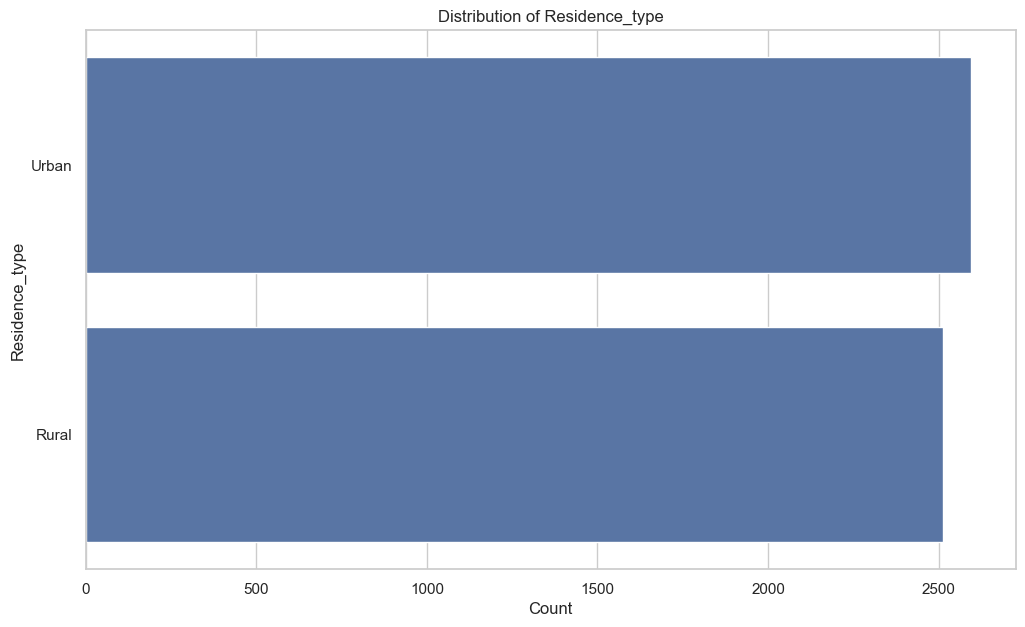

Percentages for 'Residence_type':


Residence_type
Urban    50.8%
Rural    49.2%
Name: proportion, dtype: object


--- Distribution of 'ever_married' ---


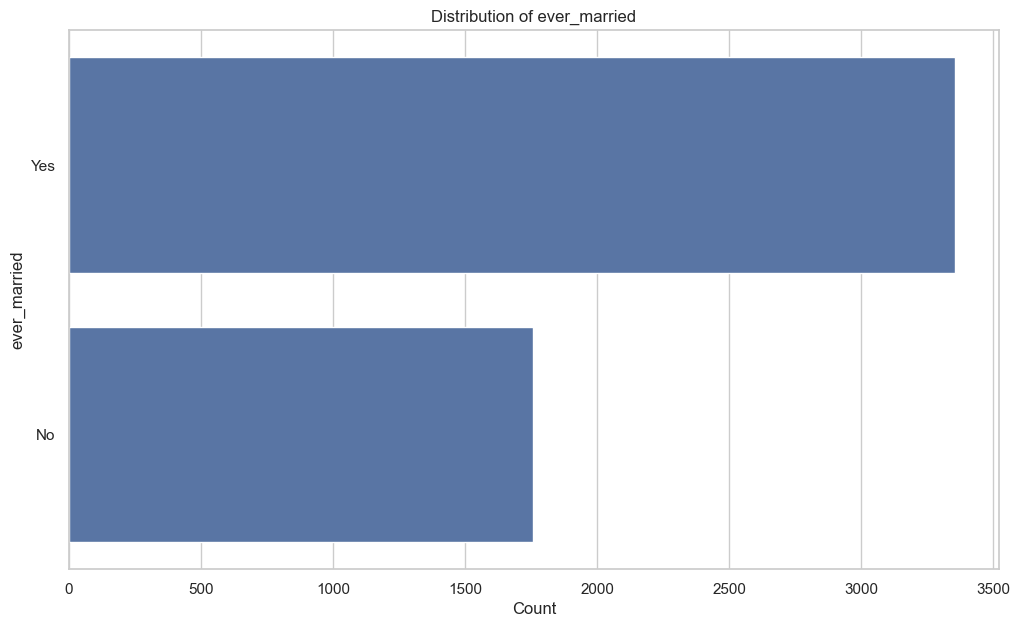

Percentages for 'ever_married':


ever_married
Yes    65.62%
No     34.38%
Name: proportion, dtype: object


--- Distribution of 'gender' ---


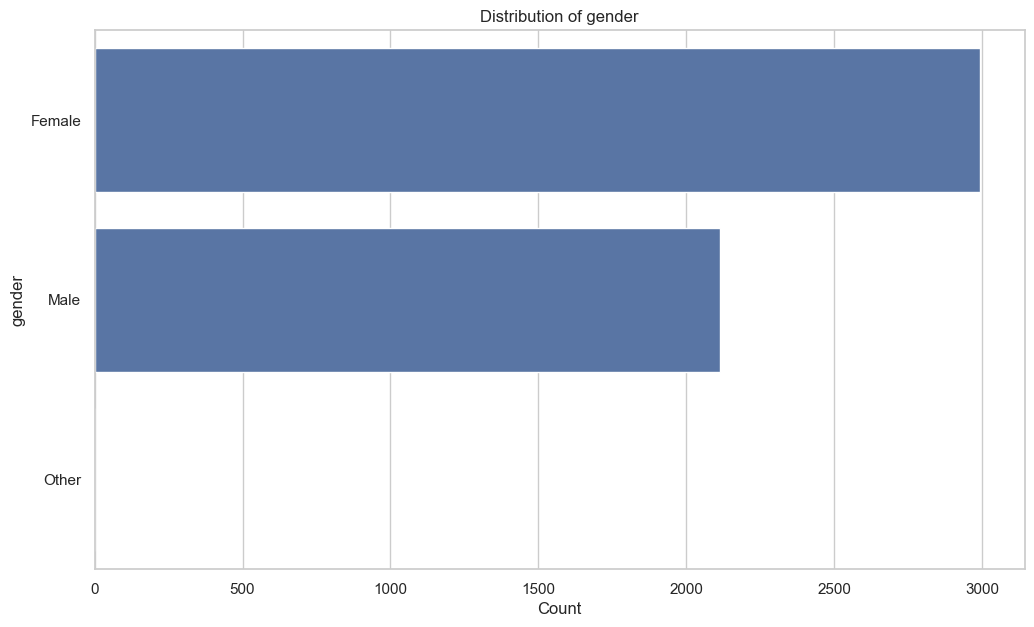

Percentages for 'gender':


gender
Female    58.59%
Male      41.39%
Other      0.02%
Name: proportion, dtype: object


--- Distribution of 'heart_disease' ---


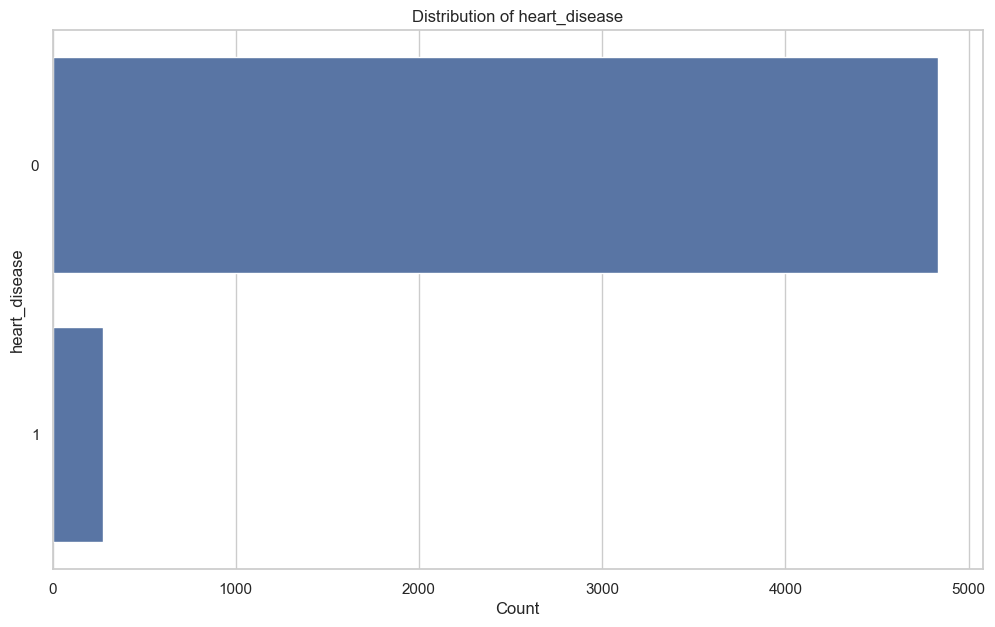

Percentages for 'heart_disease':


heart_disease
0    94.6%
1     5.4%
Name: proportion, dtype: object


--- Distribution of 'hypertension' ---


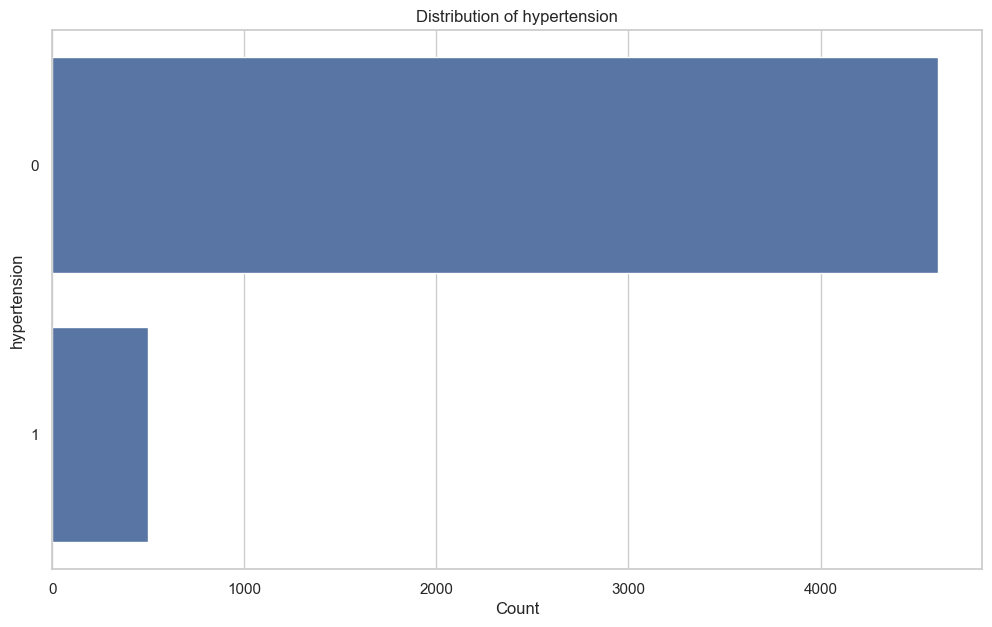

Percentages for 'hypertension':


hypertension
0    90.25%
1     9.75%
Name: proportion, dtype: object


--- Distribution of 'smoking_status' ---


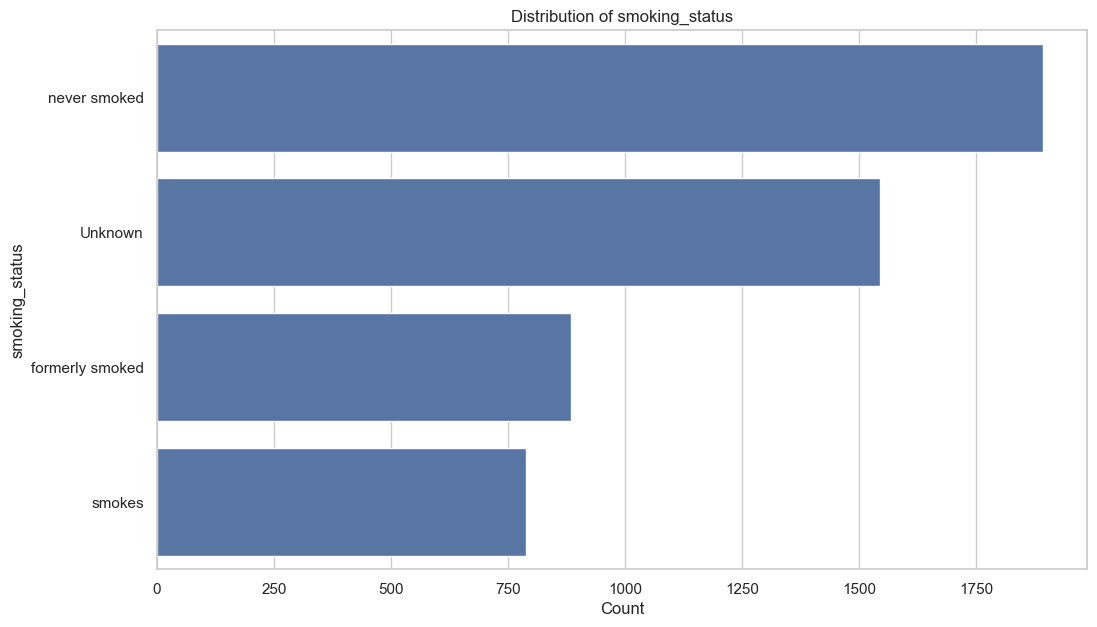

Percentages for 'smoking_status':


smoking_status
never smoked       37.03%
Unknown            30.22%
formerly smoked    17.32%
smokes             15.44%
Name: proportion, dtype: object


--- Distribution of 'stroke' ---


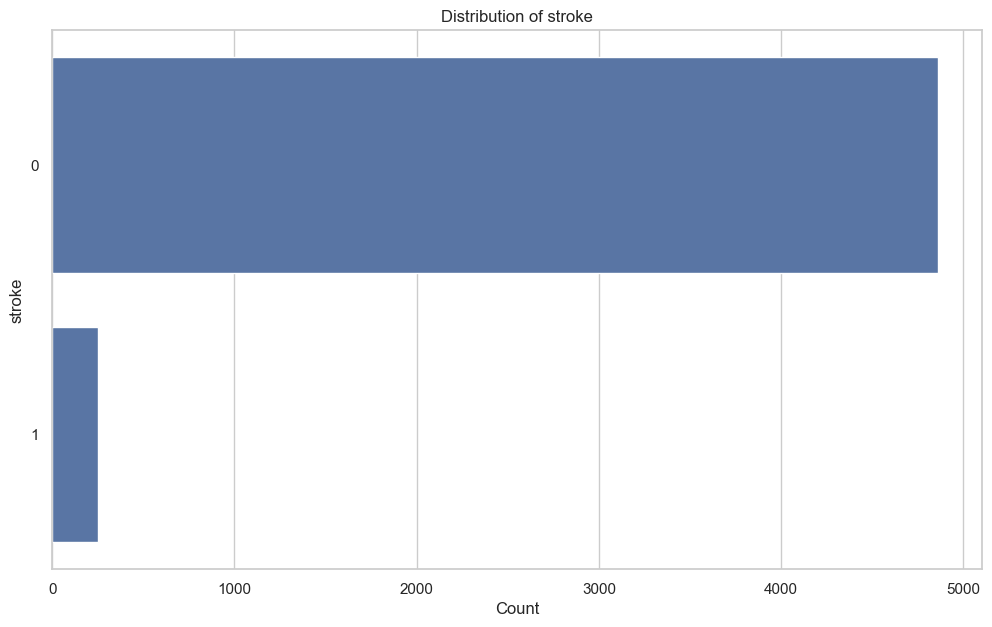

Percentages for 'stroke':


stroke
0    95.13%
1     4.87%
Name: proportion, dtype: object


--- Distribution of 'work_type' ---


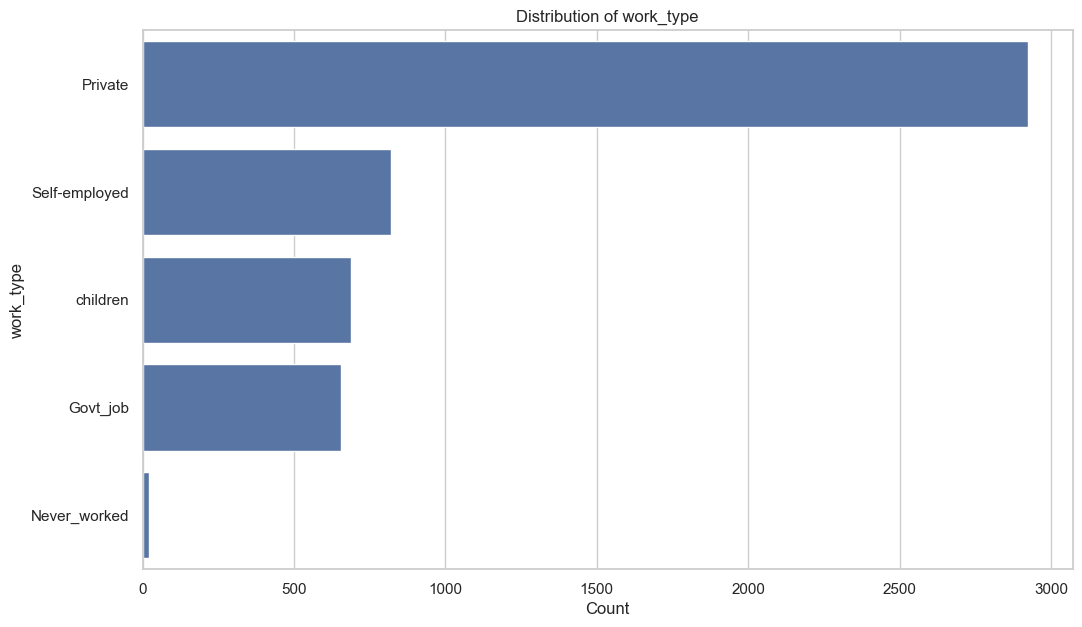

Percentages for 'work_type':


work_type
Private          57.24%
Self-employed    16.03%
children         13.44%
Govt_job         12.86%
Never_worked      0.43%
Name: proportion, dtype: object

In [96]:
# Identify categorical and binary columns treated as categories
if df is not None:
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    # Include binary columns (int64 but semantically categorical)
    binary_cols = ['hypertension', 'heart_disease', 'stroke']
    potential_cats = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] + binary_cols
    all_categorical_cols = sorted(list(set([col for col in potential_cats if col in df.columns])))

    print(f"Categorical/binary variables to analyze: {all_categorical_cols}")

    # Create count plots for each variable
    for col in all_categorical_cols:
         if col in df.columns:
            print(f"\n--- Distribution of '{col}' ---")
            # Order bars by frequency
            order = df[col].value_counts().index
            load_libs.sns.countplot(y=col, data=df, order=order) # Use y=col for horizontal bars
            load_libs.plt.title(f'Distribution of {col}')
            load_libs.plt.xlabel('Count')
            load_libs.plt.ylabel(col) # Label is the column name
            load_libs.plt.show()
            # Show percentages
            print(f"Percentages for '{col}':")
            display(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Analyzing categorical variables against stroke: ['Residence_type', 'ever_married', 'gender', 'heart_disease', 'hypertension', 'smoking_status', 'work_type']

--- Residence_type vs. stroke ---
Cross-tabulation (Row Percentages):


stroke,No Stroke (%),Stroke (%)
Residence_type,,
Rural,95.47%,4.53%
Urban,94.80%,5.20%


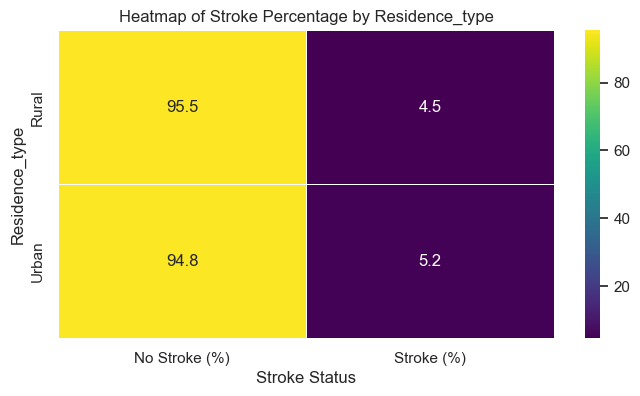


--- ever_married vs. stroke ---
Cross-tabulation (Row Percentages):


stroke,No Stroke (%),Stroke (%)
ever_married,,
No,98.35%,1.65%
Yes,93.44%,6.56%


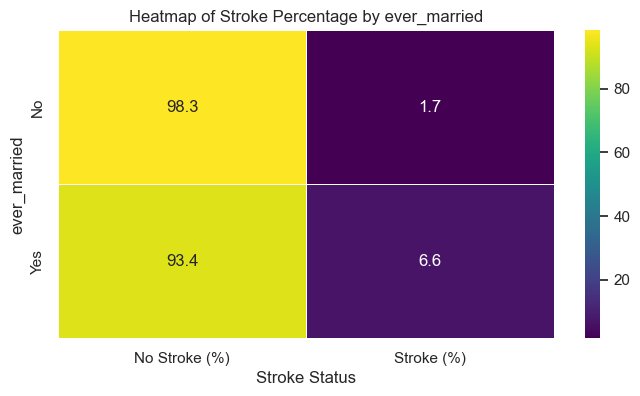


--- gender vs. stroke ---
Cross-tabulation (Row Percentages):


stroke,No Stroke (%),Stroke (%)
gender,,
Female,95.29%,4.71%
Male,94.89%,5.11%
Other,100.00%,0.00%


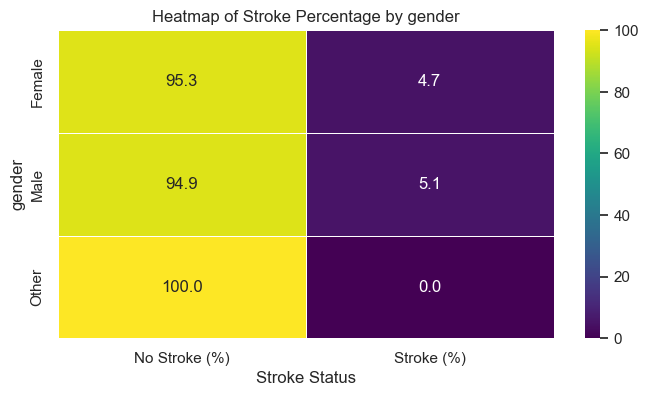


--- heart_disease vs. stroke ---
Cross-tabulation (Row Percentages):


stroke,No Stroke (%),Stroke (%)
heart_disease,,
0,95.82%,4.18%
1,82.97%,17.03%


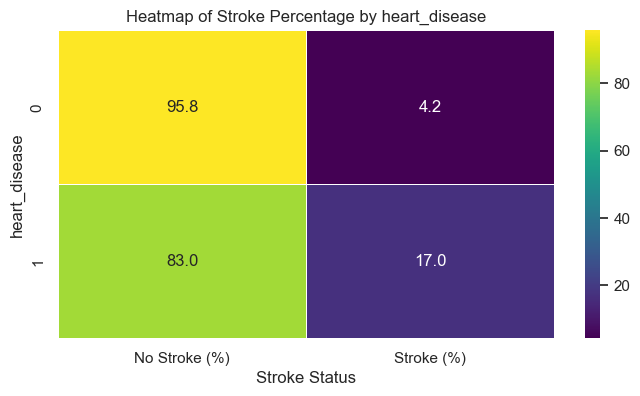


--- hypertension vs. stroke ---
Cross-tabulation (Row Percentages):


stroke,No Stroke (%),Stroke (%)
hypertension,,
0,96.03%,3.97%
1,86.75%,13.25%


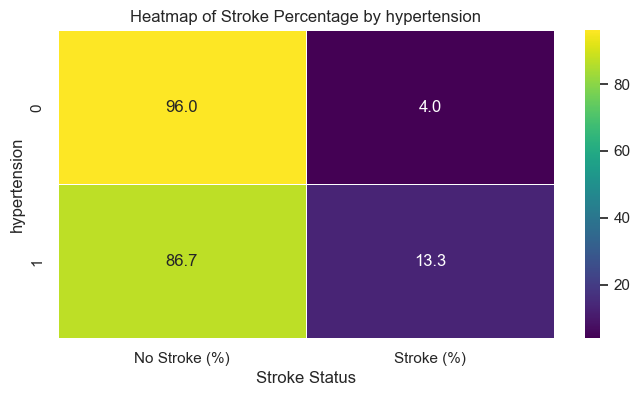


--- smoking_status vs. stroke ---
Cross-tabulation (Row Percentages):


stroke,No Stroke (%),Stroke (%)
smoking_status,,
Unknown,96.96%,3.04%
formerly smoked,92.09%,7.91%
never smoked,95.24%,4.76%
smokes,94.68%,5.32%


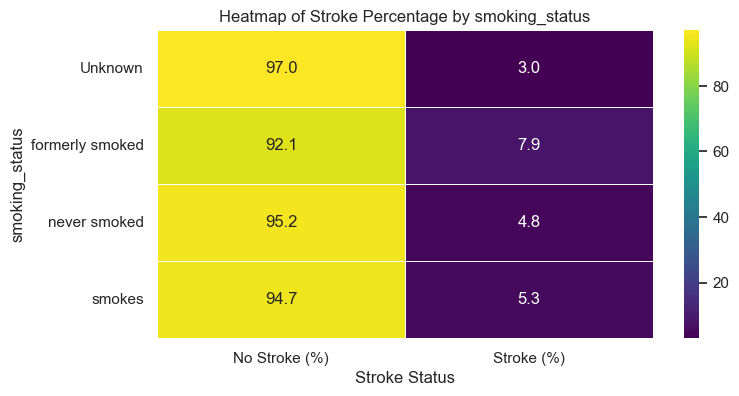


--- work_type vs. stroke ---
Cross-tabulation (Row Percentages):


stroke,No Stroke (%),Stroke (%)
work_type,,
Govt_job,94.98%,5.02%
Never_worked,100.00%,0.00%
Private,94.91%,5.09%
Self-employed,92.06%,7.94%
children,99.71%,0.29%


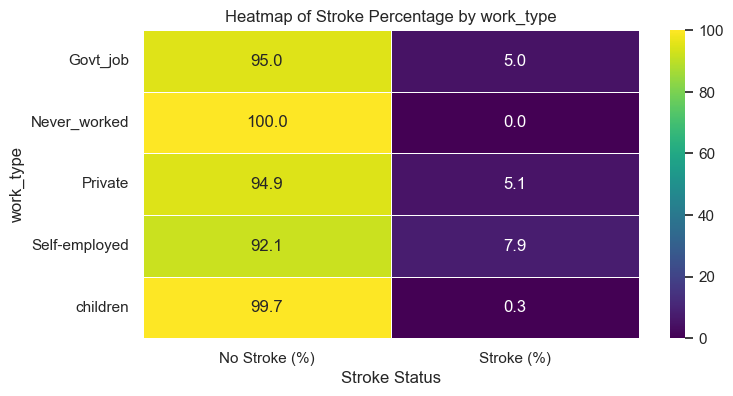

In [97]:
# %% [markdown]
# ### Categorical Variables vs. Target (stroke)
# ---

# %%
# Analyze relationship between categorical features and stroke
if df is not None and 'stroke' in df.columns:
    # Use the all_categorical_cols list defined earlier, but exclude 'stroke' itself from this comparison
    categorical_features_to_compare = [col for col in all_categorical_cols if col != 'stroke']
    print(f"Analyzing categorical variables against stroke: {categorical_features_to_compare}")

    for col in categorical_features_to_compare:
        print(f"\n--- {col} vs. stroke ---")
        # Create a cross-tabulation (frequency table) normalized by index (row percentages)
        cross_tab = pd.crosstab(index=df[col], columns=df['stroke'], normalize='index') * 100
        cross_tab = cross_tab.rename(columns={0:'No Stroke (%)', 1:'Stroke (%)'})

        # Display the crosstab table
        print("Cross-tabulation (Row Percentages):")
        display(cross_tab.style.format("{:.2f}%")) # Format percentages

        # --- Visualization Options ---

        # Option 1: Grouped Bar Chart (as before)
        # cross_tab.plot(kind='bar', stacked=False, figsize=(10, 6))
        # load_libs.plt.title(f'Percentage of Stroke within each {col} category')
        # load_libs.plt.ylabel('Percentage (%)')
        # load_libs.plt.xlabel(col)
        # load_libs.plt.xticks(rotation=0)
        # load_libs.plt.legend(title='Stroke (0: No, 1: Yes)')
        # load_libs.plt.show()

        # Option 2: Heatmap of the percentages
        load_libs.plt.figure(figsize=(8, max(4, len(cross_tab)/2))) # Adjust figsize dynamically
        load_libs.sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="viridis", linewidths=.5) # annot=True shows values
        load_libs.plt.title(f'Heatmap of Stroke Percentage by {col}')
        load_libs.plt.ylabel(col)
        load_libs.plt.xlabel('Stroke Status')
        load_libs.plt.show()


Apparently, here the features that might be more effective to be a cause of stroke : **heart_disease**, **hypertension**, **formerly_smoked**, **self-employed**

Correlation Matrix:


,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


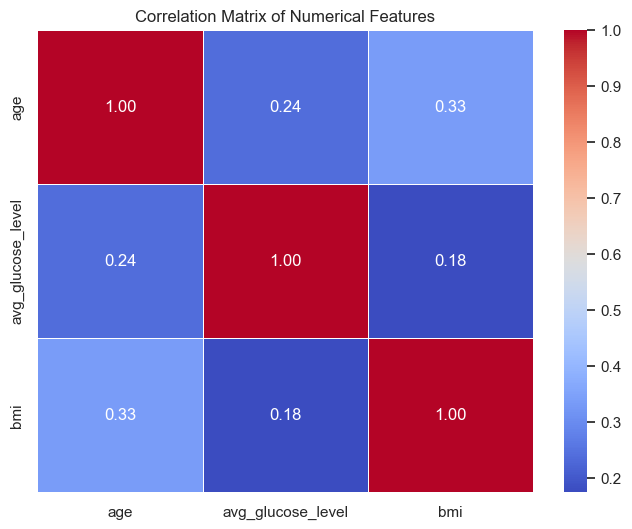

In [98]:
if df is not None:
    # Use the numerical_cols list defined earlier (age, avg_glucose_level, bmi)
    correlation_matrix = df[numerical_cols].corr()

    print("Correlation Matrix:")
    display(correlation_matrix)

    # Visualize the correlation matrix as a heatmap
    load_libs.plt.figure(figsize=(8, 6))
    load_libs.sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    load_libs.plt.title('Correlation Matrix of Numerical Features')
    load_libs.plt.show()

Mmm... not really goods values here, only < 0.3 so not enough to say anything.  
And correlation matrice is only for linear models, but it's not our goal here.